There is a directed weighted graph that consists of n nodes numbered from 0 to n - 1. The edges of the graph are initially represented by the given array edges where edges[i] = [fromi, toi, edgeCosti] meaning that there is an edge from fromi to toi with the cost edgeCosti.

Implement the Graph class:

    Graph(int n, int[][] edges) initializes the object with n nodes and the given edges.
    addEdge(int[] edge) adds an edge to the list of edges where edge = [from, to, edgeCost]. It is guaranteed that there is no edge between the two nodes before adding this one.
    int shortestPath(int node1, int node2) returns the minimum cost of a path from node1 to node2. If no path exists, return -1. The cost of a path is the sum of the costs of the edges in the path.

 

Example 1:

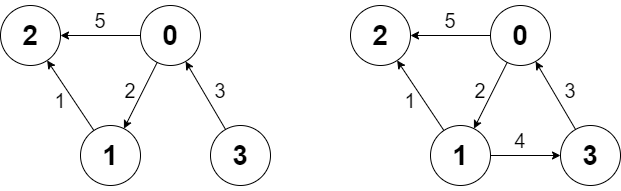

Input
["Graph", "shortestPath", "shortestPath", "addEdge", "shortestPath"]
[[4, [[0, 2, 5], [0, 1, 2], [1, 2, 1], [3, 0, 3]]], [3, 2], [0, 3], [[1, 3, 4]], [0, 3]]
Output
[null, 6, -1, null, 6]

Explanation
Graph g = new Graph(4, [[0, 2, 5], [0, 1, 2], [1, 2, 1], [3, 0, 3]]);
g.shortestPath(3, 2); // return 6. The shortest path from 3 to 2 in the first diagram above is 3 -> 0 -> 1 -> 2 with a total cost of 3 + 2 + 1 = 6.
g.shortestPath(0, 3); // return -1. There is no path from 0 to 3.
g.addEdge([1, 3, 4]); // We add an edge from node 1 to node 3, and we get the second diagram above.
g.shortestPath(0, 3); // return 6. The shortest path from 0 to 3 now is 0 -> 1 -> 3 with a total cost of 2 + 4 = 6.

 

Constraints:

    1 <= n <= 100
    0 <= edges.length <= n * (n - 1)
    edges[i].length == edge.length == 3
    0 <= fromi, toi, from, to, node1, node2 <= n - 1
    1 <= edgeCosti, edgeCost <= 106
    There are no repeated edges and no self-loops in the graph at any point.
    At most 100 calls will be made for addEdge.
    At most 100 calls will be made for shortestPath.



In [ ]:
class Graph:

    def __init__(self, n: int, edges: List[List[int]]):
        self.adj_list = [[] for _ in range(n)]
        for from_node, to_node, cost in edges:
            self.adj_list[from_node].append((to_node, cost))
        
    def addEdge(self, edge: List[int]) -> None:
        from_node, to_node, cost = edge
        self.adj_list[from_node].append((to_node, cost))
        
    def shortestPath(self, node1: int, node2: int) -> int:
        n = len(self.adj_list)
        pq = [(0, node1)]
        cost_for_node = [inf] * (n)
        cost_for_node[node1] = 0

        while pq:
            curr_cost, curr_node = heappop(pq)
            if curr_cost > cost_for_node[curr_node]:
                continue
            if curr_node == node2:
                return curr_cost
            for neighbor, cost in self.adj_list[curr_node]:
                new_cost = curr_cost + cost
                if new_cost < cost_for_node[neighbor]:
                    cost_for_node[neighbor] = new_cost
                    heappush(pq, (new_cost, neighbor))
        return -1


# Your Graph object will be instantiated and called as such:
# obj = Graph(n, edges)
# obj.addEdge(edge)
# param_2 = obj.shortestPath(node1,node2)